# Task : Developing a customer segmentation to define marketing strategy

The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

**CUST_ID:** This is a unique identifier for each credit card holder. Think of it like a membership number assigned to each customer so that their data can be tracked individually.  
**BALANCE:** This column shows the amount of money left in a customer’s credit card account. It’s the available amount they can use for making purchases.  
**BALANCE_FREQUENCY:** This tells us how often the customer’s balance is updated. A score of 1 means the balance is updated very frequently, while a score closer to 0 means it’s updated less often.  
**PURCHASES:** This represents the total amount of money the customer has spent on purchases using their credit card.  
**ONEOFF_PURCHASES:** This is the largest single purchase made by the customer. It shows the maximum amount they’ve spent in one go.  
**INSTALLMENTS_PURCHASES:** This is the total amount the customer has spent on purchases that they paid for in installments. Instead of paying all at once, they spread the payment over several months.  
**CASH_ADVANCE:** This indicates the amount of money the customer has borrowed as a cash advance using their credit card. It’s like taking a loan from the credit card company.  
**PURCHASES_FREQUENCY:** This shows how often the customer makes purchases using their credit card. A score of 1 means they make purchases very frequently, while a score of 0 means they rarely use their card for purchases.  
**ONEOFFPURCHASESFREQUENCY:** This measures how often the customer makes one-time purchases. Like the frequency of making large single purchases.  
**PURCHASESINSTALLMENTSFREQUENCY:** This shows how often the customer makes purchases in installments. A score of 1 indicates frequent installment purchases.  
**CASHADVANCEFREQUENCY:** This tells us how often the customer uses the cash advance feature of their credit card.  
**CASHADVANCETRX:** This is the total number of transactions where the customer took a cash advance. It counts how many times they’ve borrowed cash using their credit card.  
**PURCHASES_TRX:** This is the total number of purchase transactions the customer has made. It shows how often they use their credit card for buying things.  
**CREDIT_LIMIT:** This is the maximum amount of money the customer is allowed to spend using their credit card. It’s like the spending cap set by the credit card company.  
**PAYMENTS:** This represents the total amount of money the customer has paid back to the credit card company. It’s the sum of all their repayments.  
**MINIMUM_PAYMENTS:** This is the smallest amount the customer has to pay back each month to keep their credit card active and avoid penalties.  
**PRCFULLPAYMENT:** This indicates the percentage of times the customer has paid back their credit card balance in full. A higher percentage means they usually pay off their credit card completely.  
**TENURE:** This shows how long the customer has been using their credit card. It’s the duration of their relationship with the credit card company.


### Used Libraries

In [60]:
# indispensable libraries
import numpy as np
import pandas as pd
pd.options.display.max_columns = None

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# clustering algorithms, ML metrics and optimization
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster import hierarchy
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

# data transformation
from scipy.stats import yeojohnson
from sklearn.preprocessing import QuantileTransformer, MinMaxScaler

# data reduction
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

### Reading the Dataset

In [2]:
customers_df = pd.read_csv('CC GENERAL.csv')

In [3]:
customers_df.head(4)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12

In [4]:
customers_df.shape

(8950, 18)

Dimensions presented above indicate that the analysed dataset has **8950 observations and 18 variables**.

### Data Preprocessing

#### Checking Data Types of Variables

In [5]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

#### Searching for Duplicates

In [6]:
customers_df.duplicated().sum()

0

In this case there are not any duplicates to be removed.

#### Missing Values Calculation and Removal

In [7]:
customers_df.isna().sum(axis = 0)

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

There are null values in MINIMUM_PAYMENTS column to deal with this either we can drop them or we can impute it. Or there might be a case that null values are zero fee credit cards. But we can't directly claim this and we need to do hypothesis testing for this. And look at the behaviour of both the datasets with null values as minimum payments and have some values.

In [8]:
customers_df_null = customers_df[customers_df['MINIMUM_PAYMENTS'].isnull()]
customers_df_non_null = customers_df[~customers_df['MINIMUM_PAYMENTS'].isnull()]

In [9]:
customers_df_null.shape

(313, 18)

In [10]:
customers_df_null.describe()

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
count   313.000000         313.000000   313.000000        313.000000   
mean    555.441321           0.389403   393.087284        250.433387   
std    1292.687887           0.408341   757.905701        624.453991   
min       0.000000           0.000000     0.000000          0.000000   
25%       0.187069           0.090909     1.400000          0.000000   
50%      16.848358           0.181818   130.400000          0.000000   
75%     286.686616           1.000000   399.950000        176.030000   
max    9164.724752           1.000000  7597.090000       6761.290000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count              313.000000    313.000000           313.000000   
mean               142.653898    559.136698             0.336043   
std                311.289043   1185.132567             0.372517   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                  0.000000      0.000000             0.166667   
75%                152.280000    480.104401             0.583333   
max               2959.240000   7616.064965             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                  313.000000                        313.000000   
mean                     0.107886                          0.244670   
std                      0.227370                          0.359756   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.000000                          0.000000   
75%                      0.083333                          0.416667   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count              313.000000        313.000000     313.000000    313.000000   
mean                 0.067169          1.460064       5.833866   3731.789137   
std                  0.130087          3.182359       9.600908   2924.606153   
min                  0.000000          0.000000       0.000000    500.000000   
25%                  0.000000          0.000000       1.000000   1500.000000   
50%                  0.000000          0.000000       2.000000   3000.000000   
75%                  0.083333          1.000000       8.000000   5000.000000   
max                  1.000000         21.000000      77.000000  19500.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT      TENURE  
count    313.000000               0.0             313.0  313.000000  
mean     322.286168               NaN               0.0   11.063898  
std     1996.658905               NaN               0.0    1.869734  
min        0.000000               NaN               0.0    6.000000  
25%        0.000000               NaN               0.0   12.000000  
50%        0.000000               NaN               0.0   12.000000  
75%        0.000000               NaN               0.0   12.000000  
max    29272.486070               NaN               0.0   12.000000

In [11]:
customers_df_non_null.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8637.000000        8637.000000   8637.000000       8637.000000   
mean    1601.041632           0.894951   1025.315149        604.831402   
std     2095.519182           0.207833   2167.010602       1684.222861   
min        0.000000           0.000000      0.000000          0.000000   
25%      147.838347           0.909091     43.300000          0.000000   
50%      916.749476           1.000000    375.240000         44.990000   
75%     2104.961701           1.000000   1145.850000        598.950000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8637.000000   8637.000000          8637.000000   
mean               420.794807    994.082050             0.495943   
std                917.203254   2121.353259             0.401285   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 94.710000      0.000000             0.500000   
75%                484.040000   1131.986387             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8637.000000                       8637.000000   
mean                     0.205885                          0.368778   
std                      0.300044                          0.398090   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.333333                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8637.000000       8637.000000    8637.000000   8636.000000   
mean                 0.137608          3.313651      15.031492   4522.091030   
std                  0.201780          6.912151      25.179530   3659.240379   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.250000          4.000000      18.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT      TENURE  
count   8637.000000       8637.000000       8637.000000  8637.00000  
mean    1784.272537        864.206542          0.159285    11.53375  
std     2909.704331       2372.446607          0.296259     1.31226  
min        0.049513          0.019163          0.000000     6.00000  
25%      418.446951        169.123707          0.000000    12.00000  
50%      896.300688        312.343947          0.000000    12.00000  
75%     1951.116757        825.485459          0.166667    12.00000  
max    50721.483360      76406.207520          1.000000    12.00000

Looks like there is significant difference between more or less each column so let's not claim this and apply t-test

Null Hypothesis (H0): There is no significant difference in the central tendency (mean/median) of balance between credit cards with missing minimum payments and those with non-missing minimum payments.

Alternative Hypothesis (H1): There is a significant difference in the central tendency of balance between credit cards with missing minimum payments and those with non-missing minimum payments.

In [12]:
# For BALANCE column

from scipy import stats

balance_missing = customers_df_null['BALANCE']
balance_non_missing = customers_df_non_null['BALANCE']

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(balance_missing, balance_non_missing, equal_var=False)

print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

T-Statistic: -13.673867674170676
P-Value: 8.395412454965666e-35


In [13]:
# For CASH_ADVANCE column

from scipy import stats

balance_missing = customers_df_null['CASH_ADVANCE']
balance_non_missing = customers_df_non_null['CASH_ADVANCE']

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(balance_missing, balance_non_missing, equal_var=False)

print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

T-Statistic: -6.145910435683204
P-Value: 1.9723330114686984e-09


In [14]:
# For PAYMENTS column

from scipy import stats

balance_missing = customers_df_null['PAYMENTS']
balance_non_missing = customers_df_non_null['PAYMENTS']

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(balance_missing, balance_non_missing, equal_var=False)

print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

T-Statistic: -12.482788160209857
P-Value: 5.5310347471627275e-30


So we can reject the null hypothesis means the central tendencies of both the data missing and non missing are different and they are different from each other for the whole population.

And since t stats < 0 is negative which means the mean of missing wala dataset have less balance in their bank acount as compared to non-missing wala dataset.

But we can't claim that the provided cards are free. They might be but we can't say that, that is why we are dropping null values.

In [15]:
customers_df = customers_df.dropna()

#### Renaming Columns

In [16]:
old_names = customers_df.columns.tolist()
new_names = ['cust_id', 'balance', 'bal_freq', 'purchases', 'oneoff_purch', 'inst_purch', 'cash_adv', 'purch_freq', 
             'oneoff_purch_freq', 'inst_purch_freq', 'cash_adv_freq', 'cash_adv_trx', 'purch_trx', 'credit_lim',
             'payments', 'min_payments', 'prc_full_pay', 'tenure']

customers_df.rename(columns = dict(zip(old_names, new_names)), inplace = True)

In [17]:
customers_df.head(4)

cust_id      balance  bal_freq  purchases  oneoff_purch  inst_purch  \
0  C10001    40.900749  0.818182      95.40          0.00        95.4   
1  C10002  3202.467416  0.909091       0.00          0.00         0.0   
2  C10003  2495.148862  1.000000     773.17        773.17         0.0   
4  C10005   817.714335  1.000000      16.00         16.00         0.0   

      cash_adv  purch_freq  oneoff_purch_freq  inst_purch_freq  cash_adv_freq  \
0     0.000000    0.166667           0.000000         0.083333           0.00   
1  6442.945483    0.000000           0.000000         0.000000           0.25   
2     0.000000    1.000000           1.000000         0.000000           0.00   
4     0.000000    0.083333           0.083333         0.000000           0.00   

   cash_adv_trx  purch_trx  credit_lim     payments  min_payments  \
0             0          2      1000.0   201.802084    139.509787   
1             4          0      7000.0  4103.032597   1072.340217   
2             0         12      7500.0   622.066742    627.284787   
4             0          1      1200.0   678.334763    244.791237   

   prc_full_pay  tenure  
0      0.000000      12  
1      0.222222      12  
2      0.000000      12  
4      0.000000      12

#### Data Cleaning

As we saw Q3 quartile's value is alot less than the maximum values of each column there is possibility of outliers. Let's check that now.

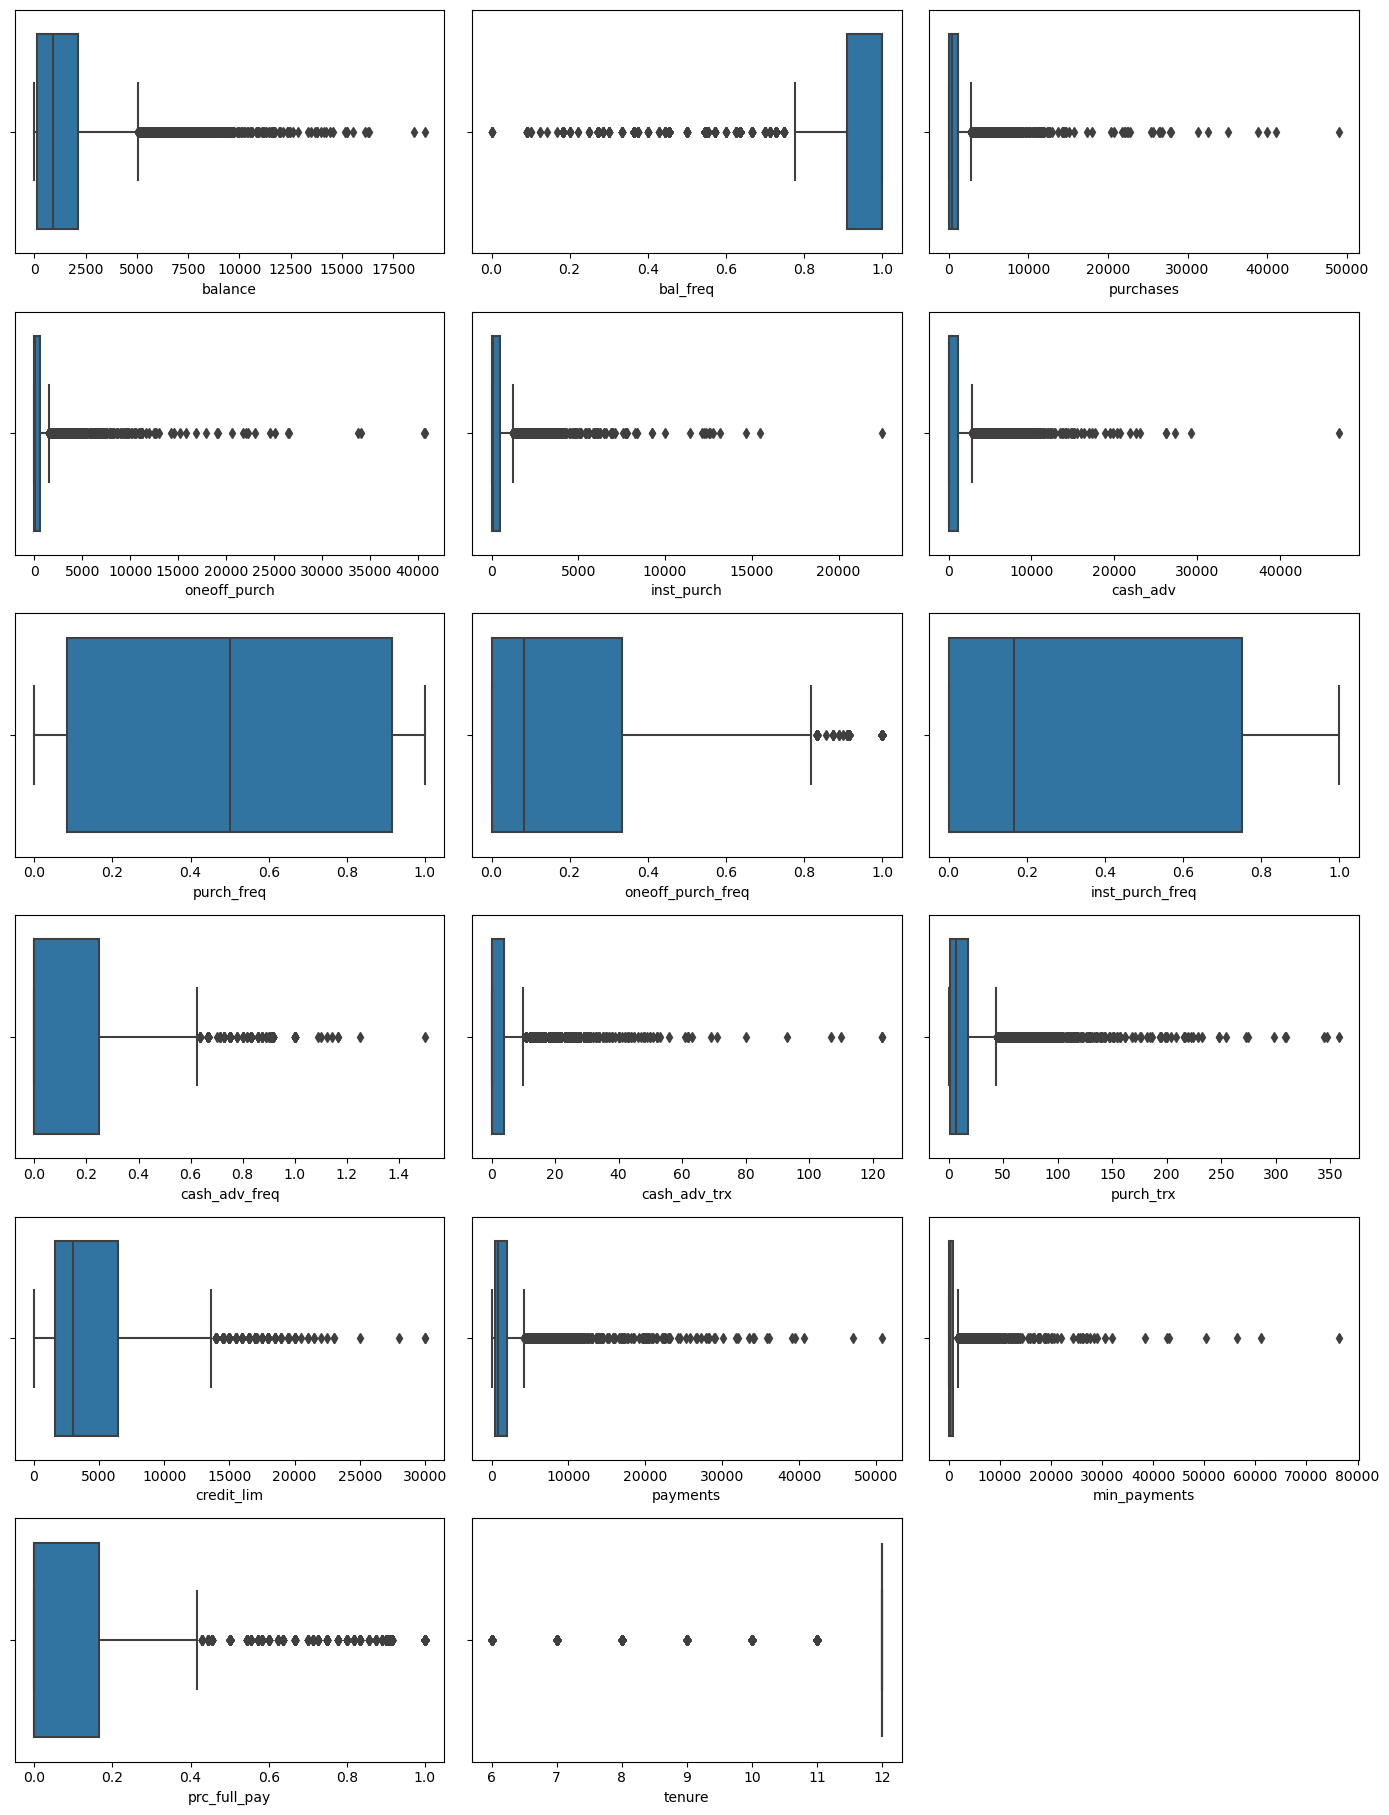

In [18]:
num_columns = customers_df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize = (14, len(num_columns) * 3))

for idx, feature in enumerate(num_columns, 1):
    plt.subplot(len(num_columns), 3, idx)
    sns.boxplot(data = customers_df, x = feature)

plt.tight_layout()
plt.show()

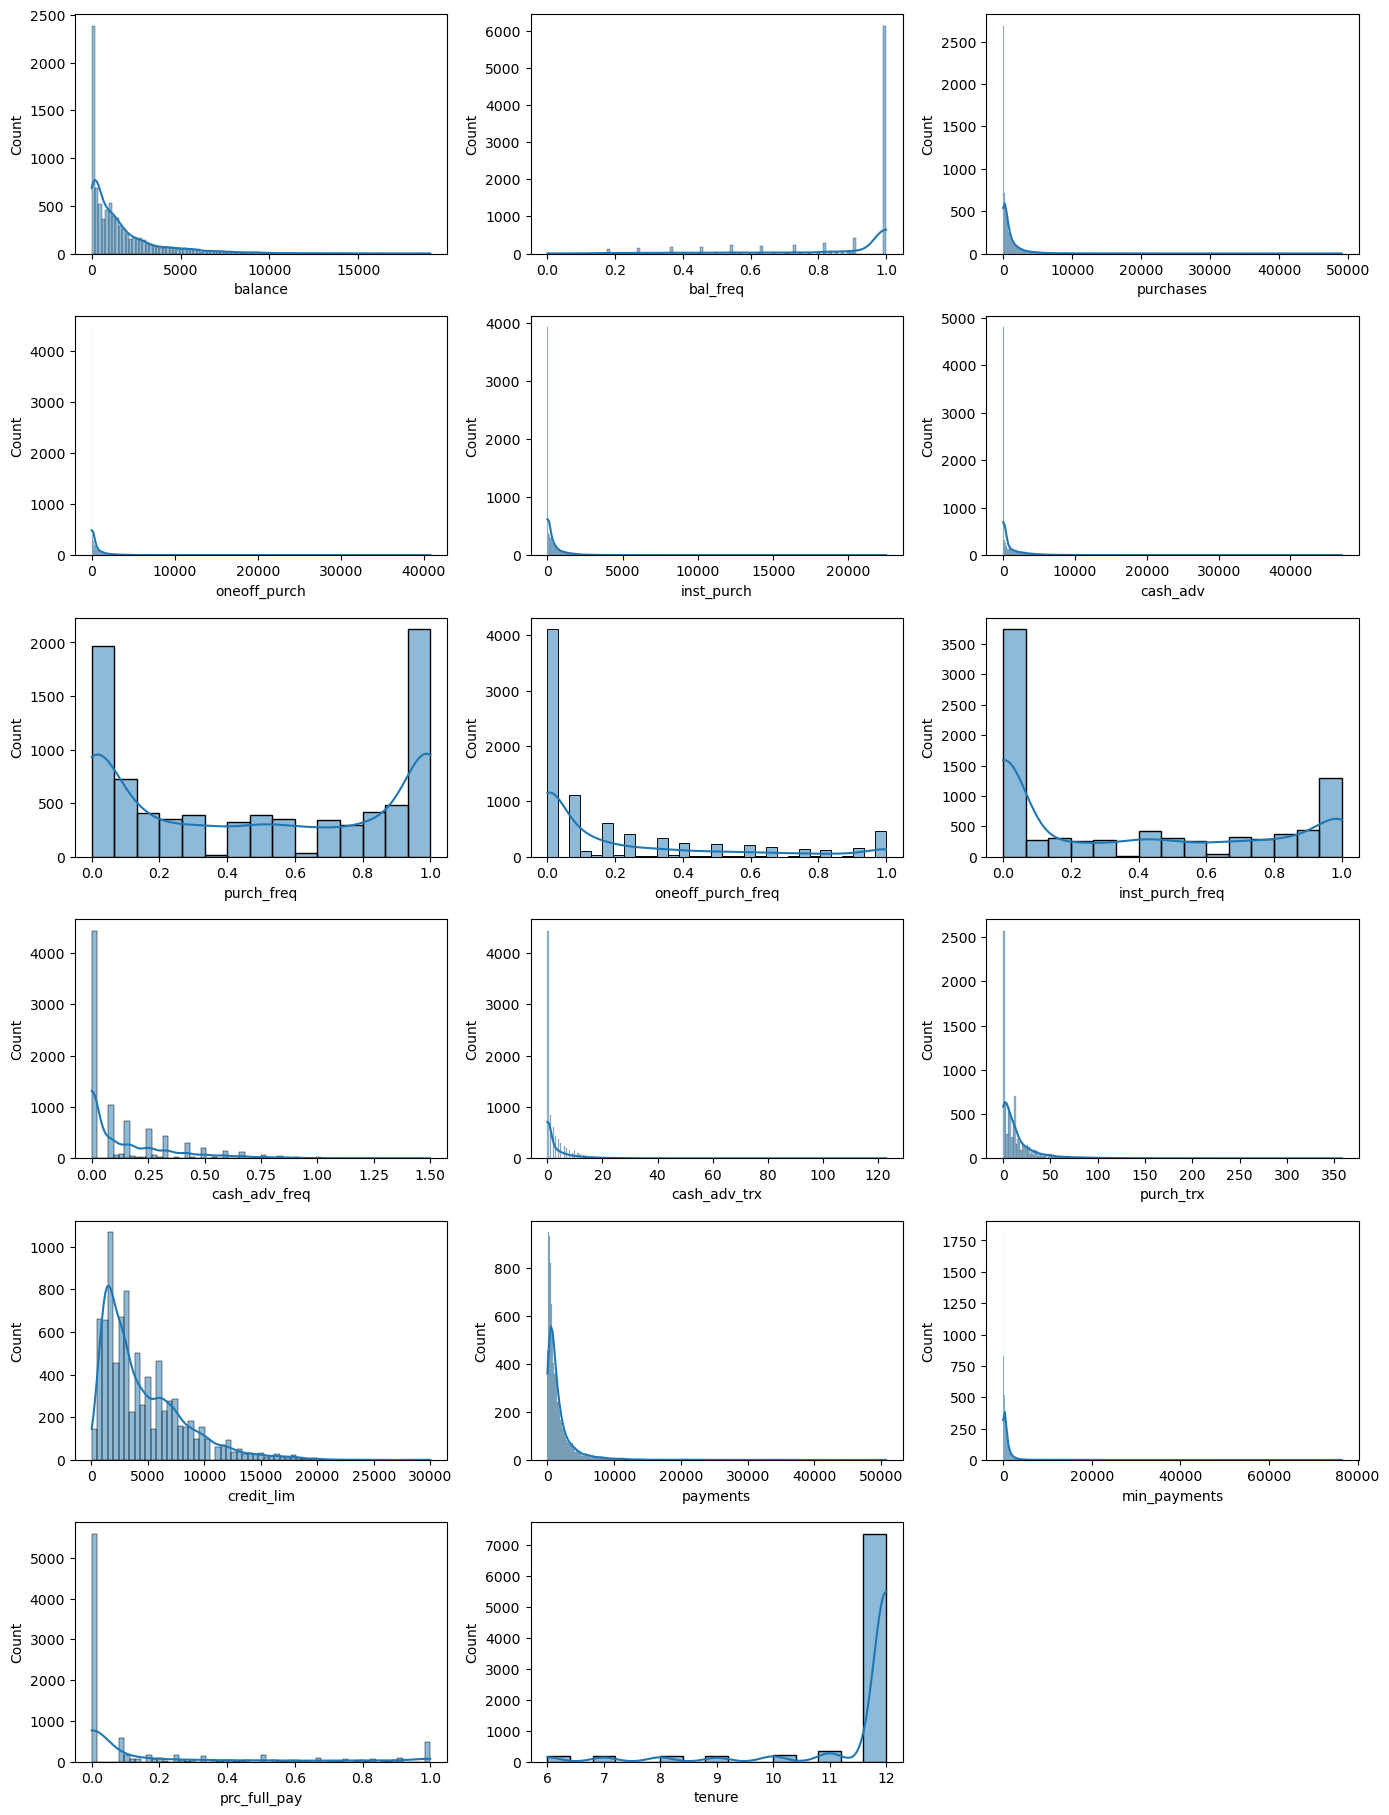

In [19]:
num_columns = customers_df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize = (14, len(num_columns) * 3))

for idx, feature in enumerate(num_columns, 1):
    plt.subplot(len(num_columns), 3, idx)
    sns.histplot(data = customers_df, x = feature, kde=True)

plt.tight_layout()
plt.show()

The data has alot of outliers and not normally distributed. So to deal with outliers we generally use IQR method now. But applying that we lost a lot of information or rows. So we are just capping each column.

In [20]:
customers_df = customers_df[customers_df['balance'] < 15000]
customers_df = customers_df[customers_df['purchases'] < 15000]
customers_df = customers_df[customers_df['oneoff_purch'] < 13000]
customers_df = customers_df[customers_df['inst_purch'] < 1000]
customers_df = customers_df[customers_df['cash_adv'] < 24000]
customers_df = customers_df[customers_df['cash_adv_freq'] <= 1.0] # This is an exception, because freq should be in range 0 - 1
customers_df = customers_df[customers_df['cash_adv_trx'] < 55]
customers_df = customers_df[customers_df['purch_trx'] < 240]
customers_df = customers_df[customers_df['credit_lim'] < 13500]
customers_df = customers_df[customers_df['payments'] < 23000]
customers_df = customers_df[customers_df['min_payments'] < 24000]
customers_df = customers_df[customers_df['prc_full_pay'] < 0.405] # 0.42

In [21]:
customers_df = customers_df.drop(['cust_id'], axis = 1)

In [22]:
customers_df.shape

(6333, 17)

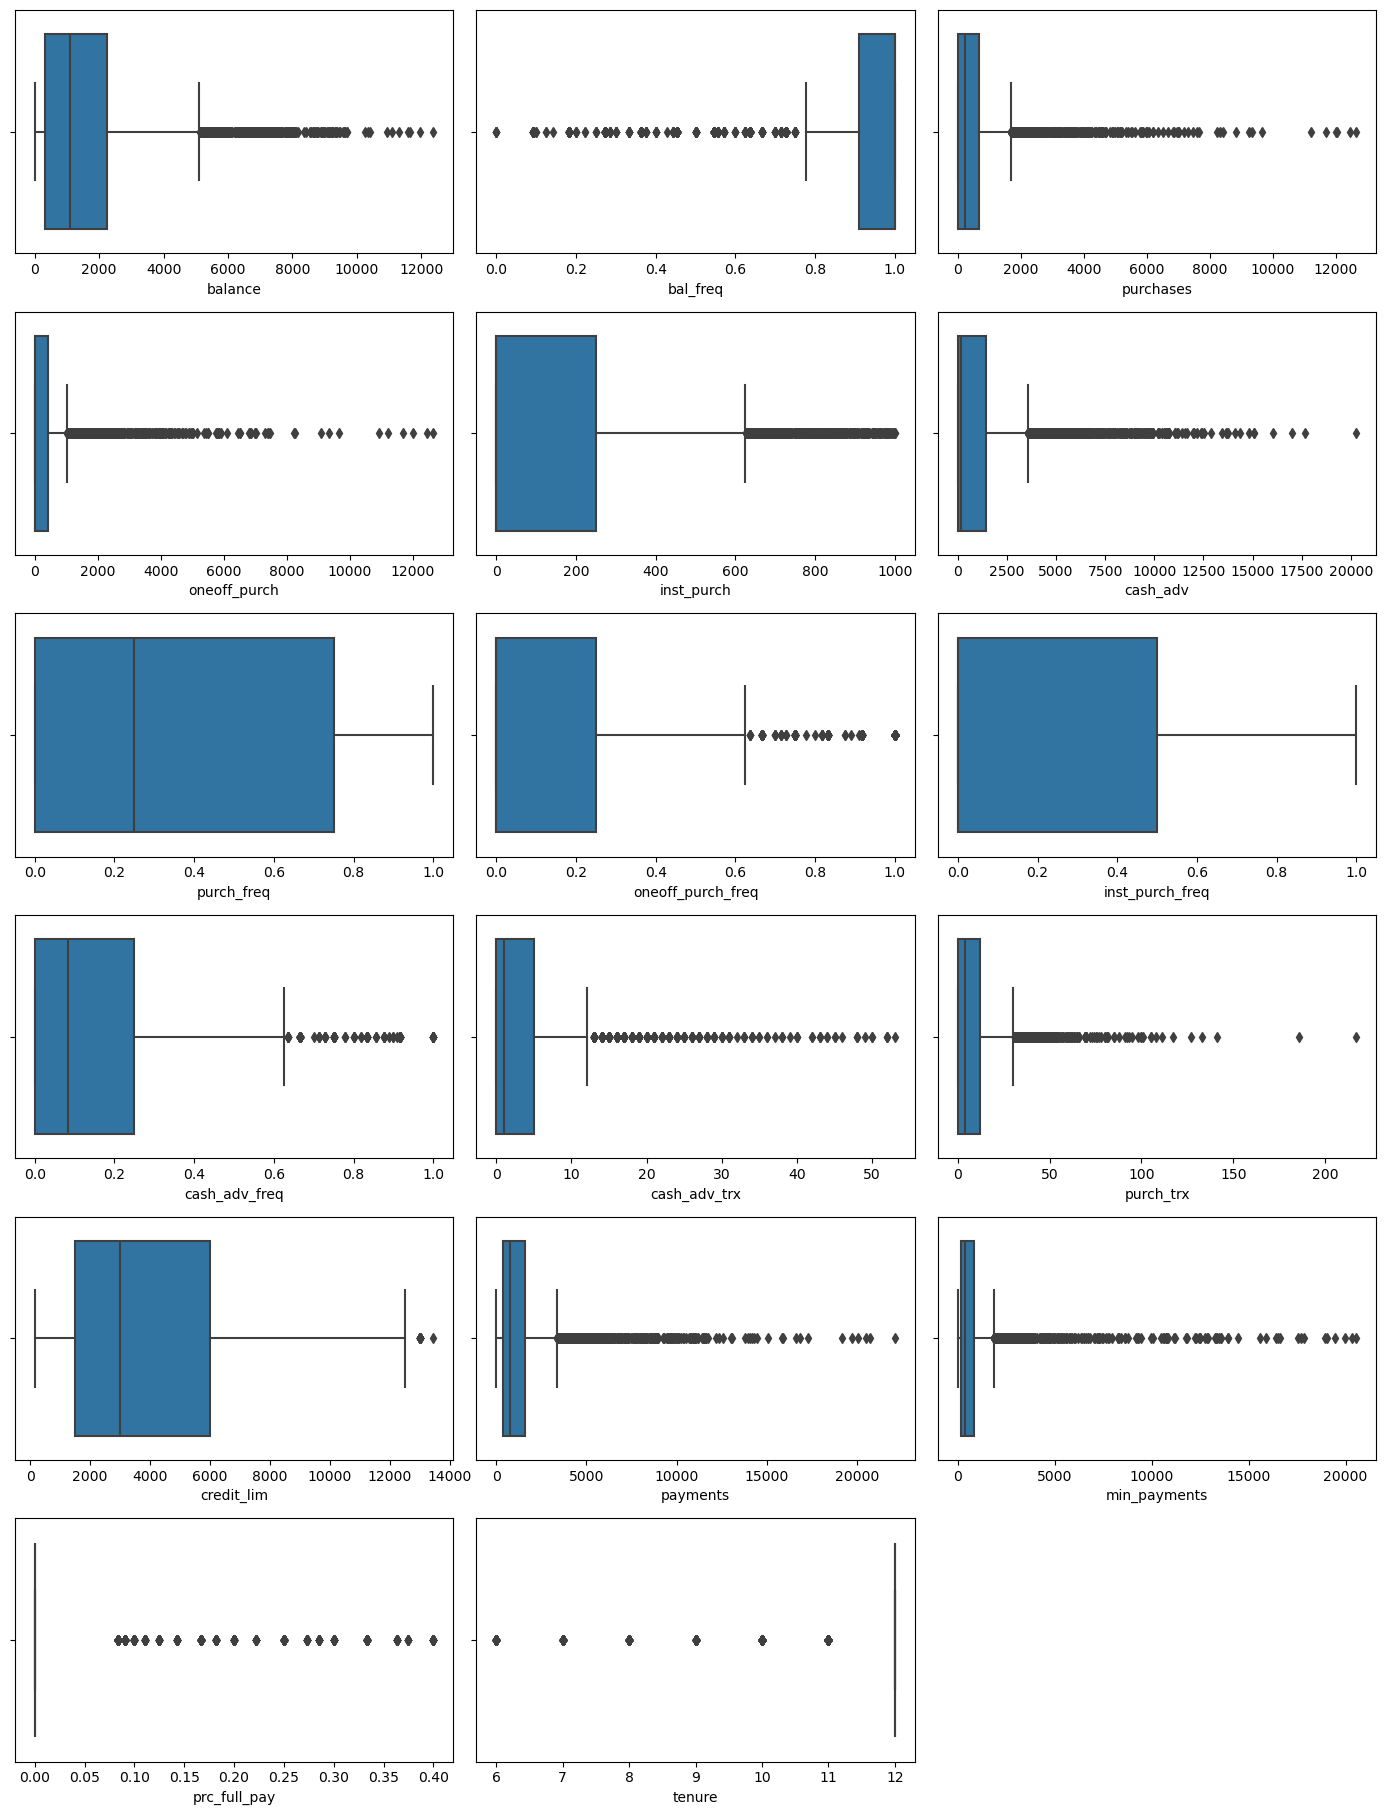

In [23]:
num_columns = customers_df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize = (14, len(num_columns) * 3))

for idx, feature in enumerate(num_columns, 1):
    plt.subplot(len(num_columns), 3, idx)
    sns.boxplot(data = customers_df, x = feature)

plt.tight_layout()
plt.show()

## Exploratory Data Analysis (EDA)

### Univariate Analysis

As we have already seen the data is alot skewed and we need to work on that. So we gonna use multiple transformers to address this problem.

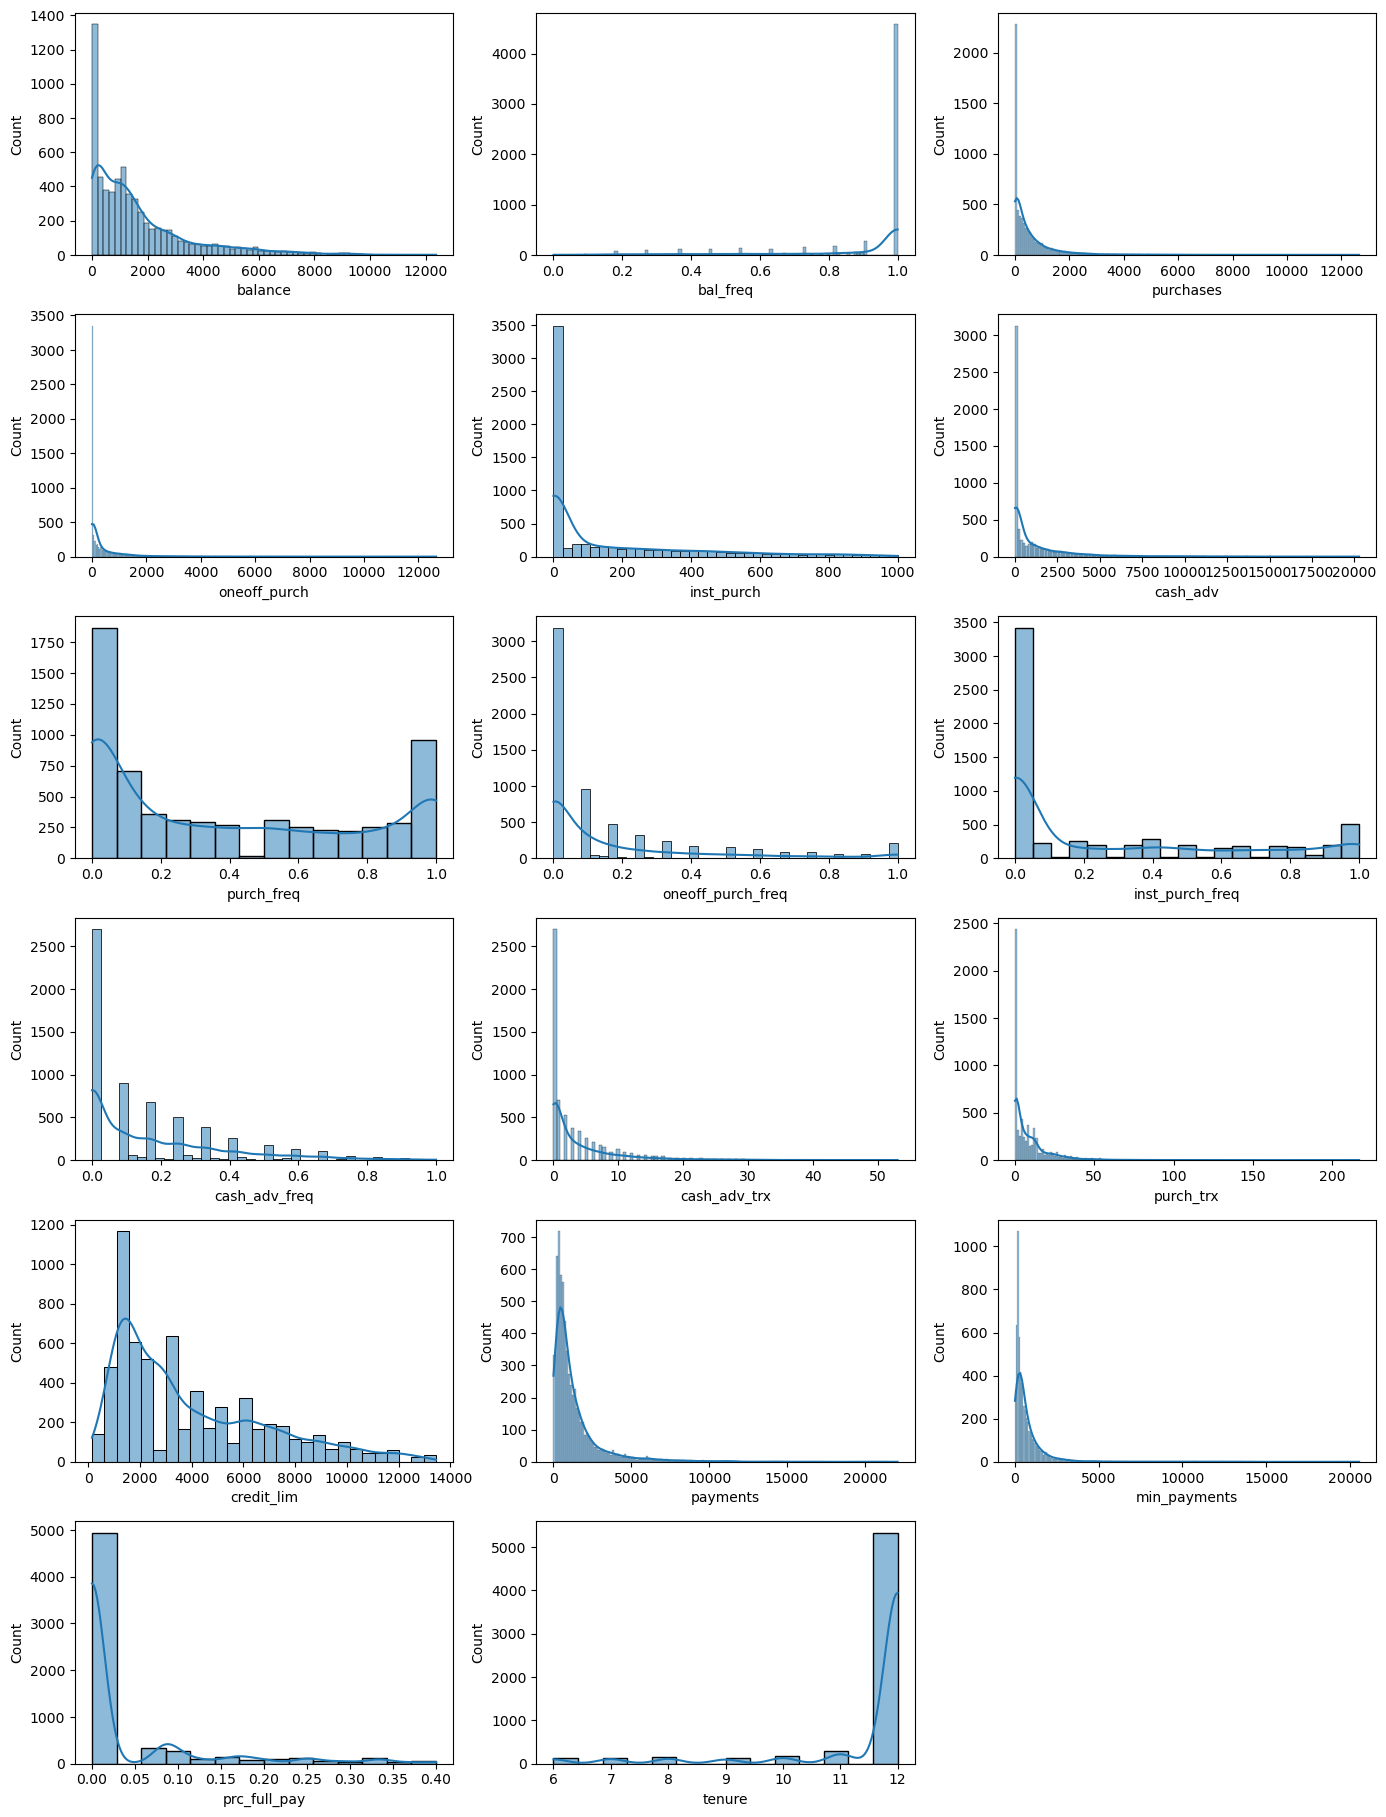

In [24]:
num_columns = customers_df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize = (14, len(num_columns) * 3))

for idx, feature in enumerate(num_columns, 1):
    plt.subplot(len(num_columns), 3, idx)
    sns.histplot(data = customers_df, x = feature, kde=True)

plt.tight_layout()
plt.show()

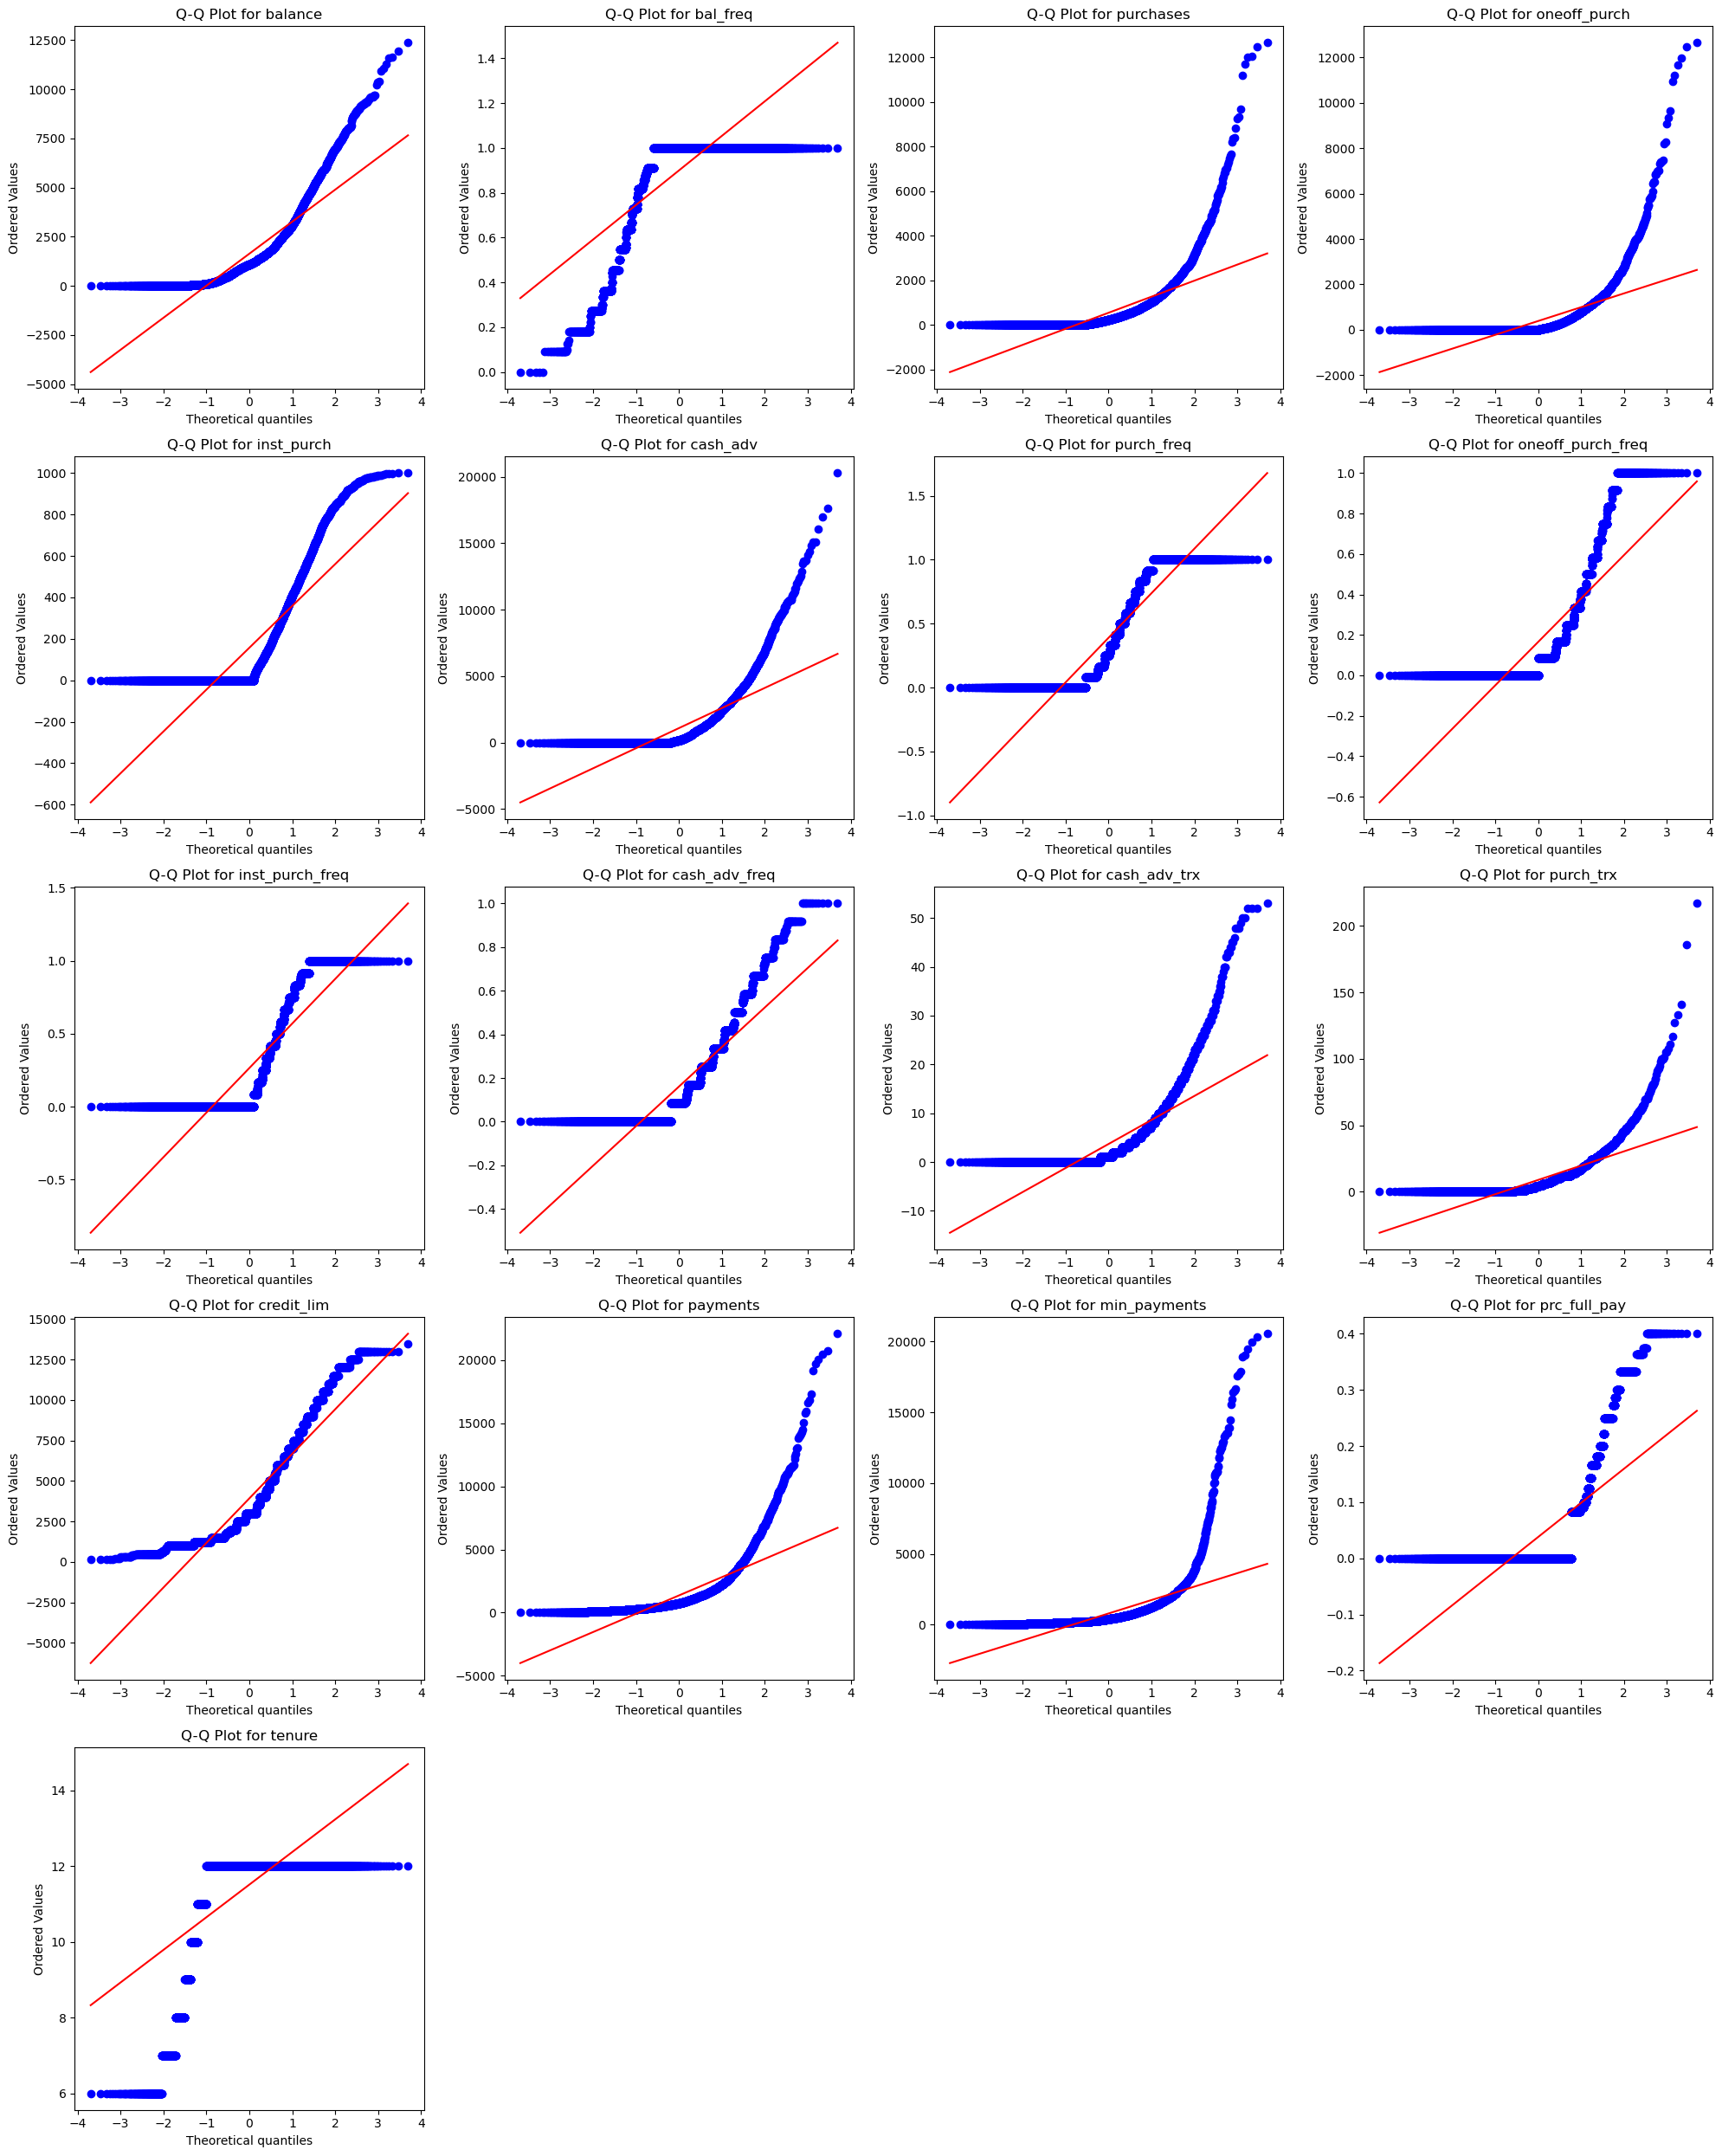

In [25]:
num_columns = customers_df.shape[1]
fig, axes = plt.subplots(nrows=(num_columns + 3) // 4, ncols=4, figsize=(20, 5 * ((num_columns + 3) // 4)))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through each column in the DataFrame
for i, column in enumerate(customers_df.columns):
    # Create Q-Q plot for each column
    stats.probplot(customers_df[column], dist="norm", plot=axes[i])
    axes[i].set_title(f'Q-Q Plot for {column}')
    axes[i].get_lines()[1].set_color('red')  # Optionally color the line in red

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

The histograms presented above indicate that all considered variables are either right or left skewed. They provide information on the extent of the skewness and suggest which transformation should be applied in order to reduce this skewness.

The distribution plots of all the columns are skewed either right skewed or left skewed. So to reduce skewness first let's apply some transformation on the data. 

Positive Skewness: When data is skewed to the right (positively skewed), it has a long tail on the right side. Common transformations include:

1. Logarithmic Transformation: Useful for reducing right skewness. Applied when data values are positive and range over several orders of magnitude.
2. Square Root Transformation: Also reduces right skewness but is less aggressive than the logarithm.
3. Reciprocal Transformation: Strongly reduces right skewness but can only be applied to positive values.
4. Negative Skewness: When data is skewed to the left (negatively skewed), it has a long tail on the left side. Common transformations include:

Square Transformation: Can reduce left skewness.
1. Reflect and Log Transformation: Reflect the data around a constant and then apply the logarithm.

Data with Zeros or Negative Values:
1. Yeo-Johnson Transformation: Can be applied to data that includes zero or negative values. This method is a generalization of the Box-Cox transformation and is more flexible in handling various data types.
2. Box-Cox Transformation: Suitable for strictly positive data. It’s a family of power transformations indexed by a parameter that optimizes the normality of the transformed data.

And if they didn't worked well we should apply Quantile Transformation.

##### After trying all the combinations of transformation on each feature we came to conclusion to apply quantile and yeo johnson transformation.

#### Quantile Transformation

In [26]:
qt_normal = QuantileTransformer(output_distribution = 'normal')

qt_normal_col = ['balance', 'credit_lim','payments', 'min_payments']

for feature in qt_normal_col:
    customers_df[feature] = qt_normal.fit_transform(customers_df[[feature]])

#### Yeo-Johnson Transformation

In [27]:
yeojohnson_col = list(set(customers_df.columns.to_list()) - set(qt_normal_col))

for feature in yeojohnson_col:
    customers_df[feature], _ = yeojohnson(customers_df[feature])

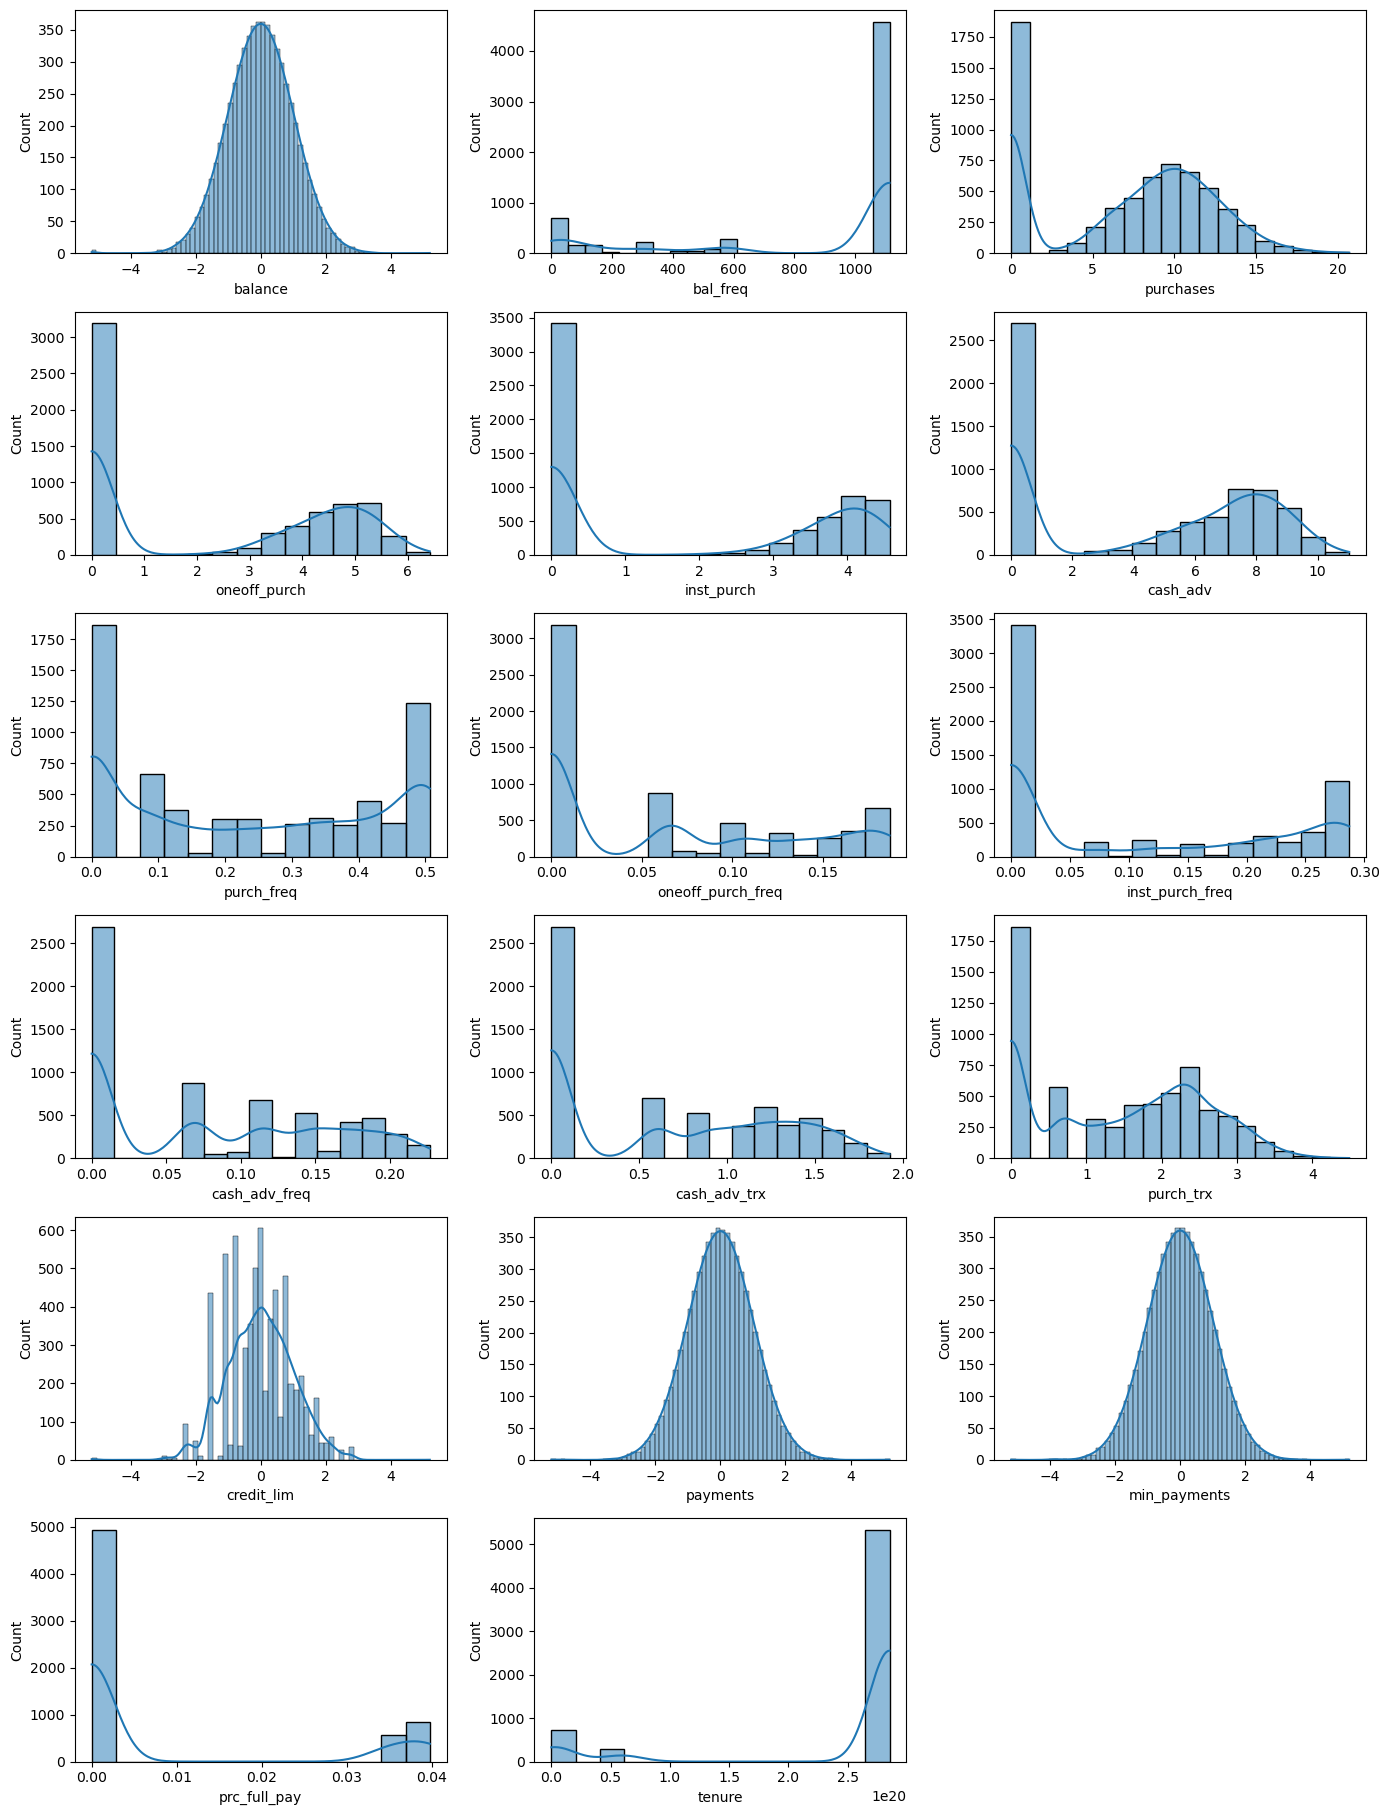

In [28]:
num_columns = customers_df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize = (14, len(num_columns) * 3))

for idx, feature in enumerate(num_columns, 1):
    plt.subplot(len(num_columns), 3, idx)
    sns.histplot(data = customers_df, x = feature, kde=True)

plt.tight_layout()
plt.show()

Despite the applied transformations, many variables remained skewed. In my opinion, this is caused by a high number of customers who did not make purchases. Quantile transformations were particularly successful in variables such as: **'balance'**, **'credit_lim'**, **'payments'** and **'min_payments'**. However, Yeo-Johnson transformations in many cases created **zero-inflated Poisson distributions**. These distributions are difficult to manage because there are high numbers of zeros.

#### Data Scaling

In [29]:
scaler = MinMaxScaler()
customers_arr = scaler.fit_transform(customers_df)
customers_df = pd.DataFrame(customers_arr, columns = num_columns)

### Bivariate Analysis

### Searching Highly Correlated Variables

<Axes: title={'center': 'Pearson Correlation of Features'}>

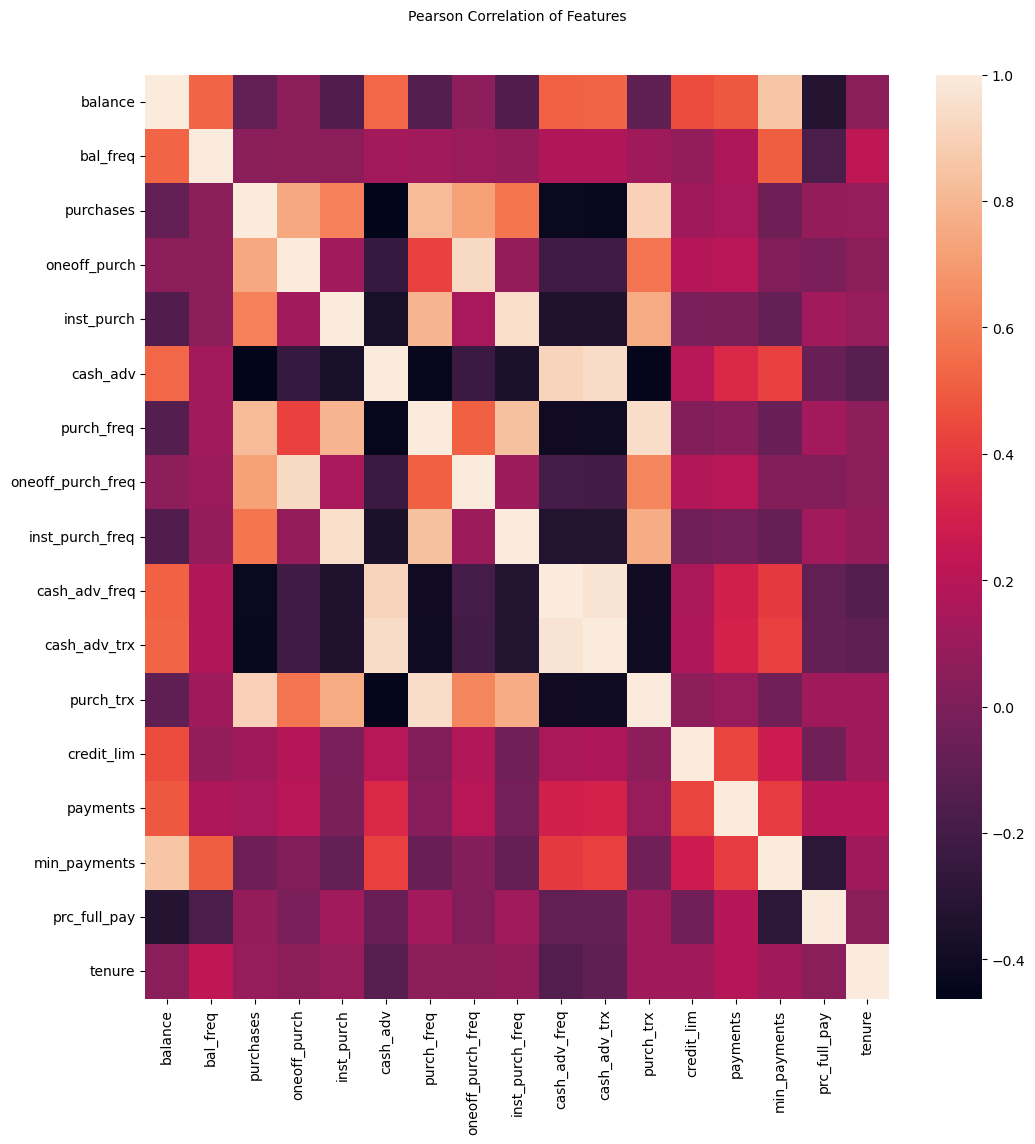

In [30]:
plt.figure(figsize=(12, 12))
plt.title('Pearson Correlation of Features', y = 1.05, size = 10)
sns.heatmap(customers_df.corr())

In [31]:
customers_df.corr()

balance  bal_freq  purchases  oneoff_purch  inst_purch  \
balance            1.000000  0.522868  -0.090508      0.049957   -0.156955   
bal_freq           0.522868  1.000000   0.044658      0.052081    0.057210   
purchases         -0.090508  0.044658   1.000000      0.753484    0.613714   
oneoff_purch       0.049957  0.052081   0.753484      1.000000    0.123695   
inst_purch        -0.156955  0.057210   0.613714      0.123695    1.000000   
cash_adv           0.535799  0.137610  -0.462027     -0.247553   -0.366205   
purch_freq        -0.138734  0.120673   0.820407      0.427333    0.790098   
oneoff_purch_freq  0.063104  0.101141   0.721016      0.931334    0.145703   
inst_purch_freq   -0.158149  0.082063   0.577760      0.082227    0.951561   
cash_adv_freq      0.516939  0.177351  -0.420225     -0.212243   -0.338294   
cash_adv_trx       0.525240  0.175690  -0.427880     -0.217377   -0.339645   
purch_trx         -0.102077  0.111899   0.901858      0.571852    0.755180   
credit_lim         0.454069  0.077937   0.117166      0.187880   -0.009450   
payments           0.488458  0.160938   0.143558      0.204256    0.000188   
min_payments       0.856510  0.504161  -0.055634      0.016200   -0.081901   
prc_full_pay      -0.319742 -0.173886   0.083642     -0.005266    0.124910   
tenure             0.042731  0.228638   0.086697      0.055876    0.087644   

                   cash_adv  purch_freq  oneoff_purch_freq  inst_purch_freq  \
balance            0.535799   -0.138734           0.063104        -0.158149   
bal_freq           0.137610    0.120673           0.101141         0.082063   
purchases         -0.462027    0.820407           0.721016         0.577760   
oneoff_purch      -0.247553    0.427333           0.931334         0.082227   
inst_purch        -0.366205    0.790098           0.145703         0.951561   
cash_adv           1.000000   -0.442573          -0.236111        -0.356557   
purch_freq        -0.442573    1.000000           0.510145         0.834622   
oneoff_purch_freq -0.236111    0.510145           1.000000         0.107807   
inst_purch_freq   -0.356557    0.834622           0.107807         1.000000   
cash_adv_freq      0.909864   -0.400207          -0.195837        -0.328928   
cash_adv_trx       0.938212   -0.407516          -0.204333        -0.330622   
purch_trx         -0.446883    0.947891           0.629603         0.761712   
credit_lim         0.199571    0.014243           0.182576        -0.039486   
payments           0.334372    0.035904           0.204328        -0.023219   
min_payments       0.412989   -0.072866           0.028028        -0.077546   
prc_full_pay      -0.073197    0.130439           0.013500         0.126039   
tenure            -0.126234    0.062996           0.046579         0.069138   

                   cash_adv_freq  cash_adv_trx  purch_trx  credit_lim  \
balance                 0.516939      0.525240  -0.102077    0.454069   
bal_freq                0.177351      0.175690   0.111899    0.077937   
purchases              -0.420225     -0.427880   0.901858    0.117166   
oneoff_purch           -0.212243     -0.217377   0.571852    0.187880   
inst_purch             -0.338294     -0.339645   0.755180   -0.009450   
cash_adv                0.909864      0.938212  -0.446883    0.199571   
purch_freq             -0.400207     -0.407516   0.947891    0.014243   
oneoff_purch_freq      -0.195837     -0.204333   0.629603    0.182576   
inst_purch_freq        -0.328928     -0.330622   0.761712   -0.039486   
cash_adv_freq           1.000000      0.971217  -0.402399    0.159679   
cash_adv_trx            0.971217      1.000000  -0.407824    0.161559   
purch_trx              -0.402399     -0.407824   1.000000    0.062540   
credit_lim              0.159679      0.161559   0.062540    1.000000   
payments                0.294713      0.306578   0.093345    0.430850   
min_payments            0.398125      0.421240  -0.039522    0.273042   
prc_full_pay           -

In the correlation matrix visible above, you can see that some variables are not correlated, whereas other variables are strongly connected. I am going to use PCA, so at this point, I am not making use of this information.

As I mentioned it earlier, columns that still have high skewness, are removed from the dataset.

In [32]:
customers_arr = np.delete(customers_arr, np.s_[1, 2, 7, 8, 9, 10, 11, 15, 16], axis = 1) 

In [33]:
customers_arr.shape

(6333, 8)

In [34]:
customers_df = customers_df.drop(['bal_freq', 'purchases', 'oneoff_purch_freq', 'inst_purch_freq', 'cash_adv_freq',
                                  'cash_adv_trx','purch_trx', 'prc_full_pay', 'tenure'], axis='columns')

In [35]:
customers_df.shape

(6333, 8)

### Principal Component Analysis (PCA)

In [36]:
pca = PCA()
customers_pca = pca.fit_transform(customers_arr)

Scree Plot : 

explained variance ratio [0.5601979  0.20684026 0.15031497 0.03828868 0.02313175 0.01157607
 0.00802831 0.00162206]
cumulative variance ratio [0.5601979  0.76703816 0.91735314 0.95564181 0.97877357 0.99034963
 0.99837794 1.        ]


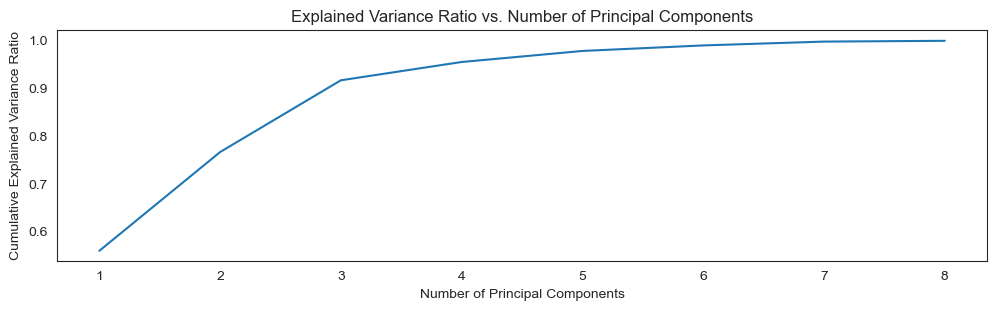

In [37]:
explained_var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = np.cumsum(explained_var_ratio)
print('explained variance ratio', explained_var_ratio)
print('cumulative variance ratio', cumulative_var_ratio)

plt.figure(figsize = (12, 3))
sns.set_style('white')
plt.plot(range(1, len(cumulative_var_ratio) + 1), cumulative_var_ratio)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.show()

We can see cumulative variance means 91.7% variance or data information can be decided by 3 principal components. So this would be the best choice to make. And we will be using three PCs further.

In [38]:
pca = PCA(n_components = 3)
customers_pca = pca.fit_transform(customers_arr)
loadings = pd.DataFrame(pca.components_, columns = customers_df.columns, index=['PC1', 'PC2', 'PC3'])

In [39]:
loadings.T

PC1       PC2       PC3
balance      -0.039396  0.020102  0.189483
oneoff_purch  0.280392  0.871773  0.232905
inst_purch    0.642261 -0.465140  0.211778
cash_adv     -0.353550 -0.139715  0.875023
purch_freq    0.617766  0.009822  0.194923
credit_lim   -0.001939  0.043567  0.107591
payments     -0.004006  0.041443  0.159241
min_payments -0.026003  0.004539  0.156231

From this we can know a lot about PCs. 

### Principal Components Interpretation:

- **PC1: Installment & Frequent Purchases vs. Cash Advances**
  - **Positively correlated with**:
    - **inst_purch** (0.642): Installment purchases.
    - **purch_freq** (0.618): Purchase frequency.
  - **Negatively correlated with**:
    - **cash_adv** (-0.354): Cash advances.
  - **Interpretation**: This component reflects a contrast between customers making frequent installment-based purchases and those relying less on cash advances.

- **PC2: One-Time Purchases vs. Installment Purchases**
  - **Positively correlated with**:
    - **oneoff_purch** (0.872): One-time purchases.
  - **Negatively correlated with**:
    - **inst_purch** (-0.465): Installment purchases.
  - **Interpretation**: This component highlights a contrast between one-time purchases and installment purchases. Customers strongly associated with this component may prefer one-off payments over installments.

- **PC3: Cash Advances**
  - **Positively correlated with**:
    - **cash_adv** (0.875): Cash advances.
  - **Negatively correlated with**:
    - **balance** (0.189): Account balance.
  - **Interpretation**: This component is mainly driven by customers who rely heavily on cash advances.


In [40]:
customers_pca_df = pd.DataFrame(customers_pca, columns= ['Inst & Freq vs Cash', 'One-Time vs Inst', 'Cash-Advance'])

In [41]:
customers_pca_df.head(2)

Inst & Freq vs Cash  One-Time vs Inst  Cash-Advance
0             0.171109         -0.439220     -0.449412
1            -0.812640         -0.186036      0.239013

## Clustering methods

There are many clustering algorithms. They can be grouped into the following families:

- **Centroid-based Algorithms** focus on minimizing the distance of data points from the cluster centers. <br>
Example:  K-Means

- **Density-based Algorithms** identify clusters as areas of high point density separated by areas of low point density. <br>
Example: DBSCAN

- **Hierarchical Algorithms** create a hierarchy of clusters through iterative merging or splitting of clusters. <br>
Example: Agglomerative Clustering

### K-Means

#### Silhouette Score Plot

In [42]:
def visualizing_silhouette_plot(data_arr, method):
    silh_scores = []
    k = range(2, 10)

    for n in k:
        m = method(n_clusters = n)
        m.fit(data_arr)
        labels = m.labels_
        silh_scores.append(silhouette_score(data_arr, labels, metric = 'euclidean'))

    plt.figure(figsize = (12, 3))
    sns.set_style('white')
    plt.plot(k, silh_scores, marker='o', color = 'blue', alpha = 0.8, linewidth = 1)
    plt.xlabel('k')
    plt.ylabel('Silhouette score')
    plt.title(f'Silhouette analysis for optimal k')
    plt.show()

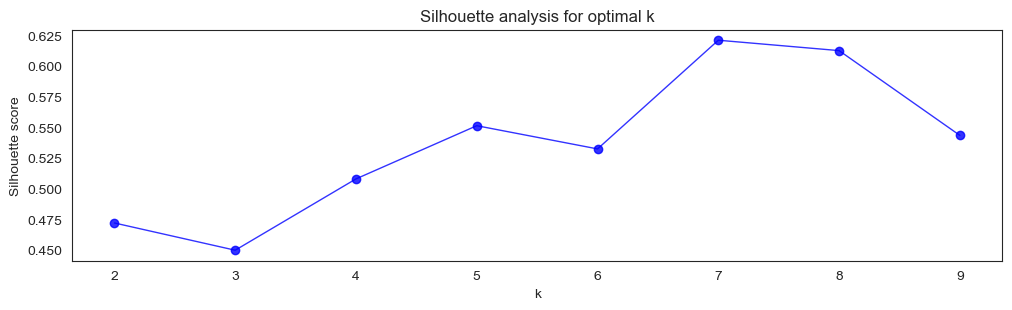

In [43]:
visualizing_silhouette_plot(customers_pca, KMeans)

As you can see, this visualization confirms that k = 7 is a very good choice, it also underlines the fact that
k = 8 is quite good as well. These values are much better then k = 5 or k = 6. 0.625 silhouette score suggests that, on average, the objects are well-clustered.

#### Silhouette Diagram

A silhouette diagram is a graphical representation used to visualize the quality of a clustering solution. It displays the silhouette coefficient for each instance, helping to understand how well each point fits within its cluster relative to other clusters.

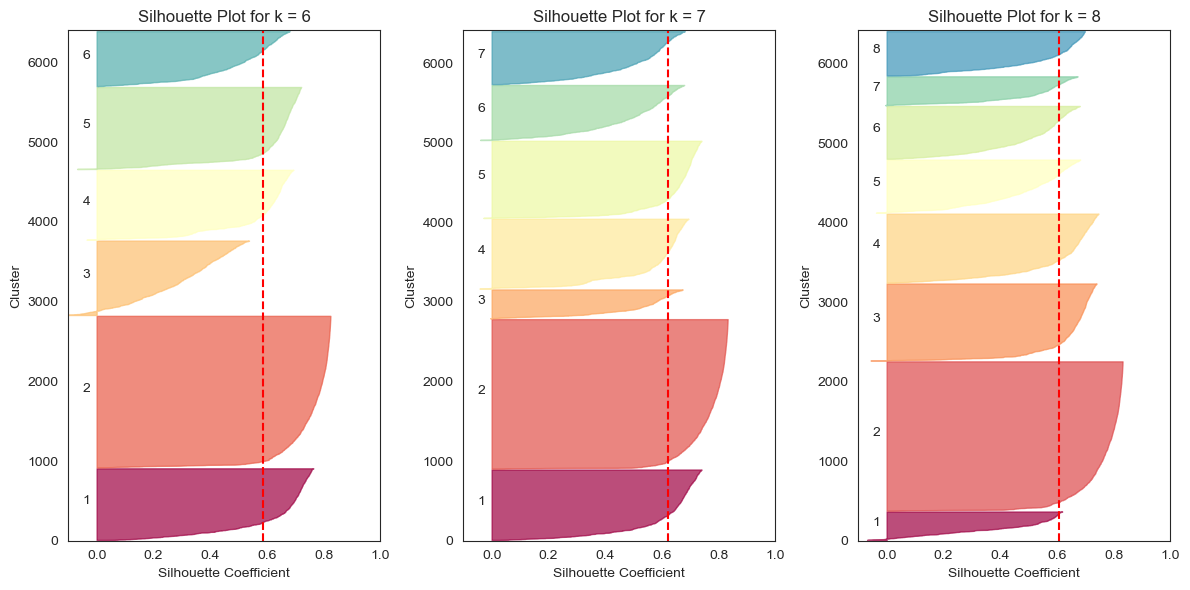

In [44]:
fig, ax = plt.subplots(1, 3, figsize=(12, 6))

clusters = [6,7,8]

for i, k in enumerate(clusters):
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=42)
    cluster_labels = km.fit_predict(customers_pca)
    
    # Silhouette Plot
    silhouette_avg = silhouette_score(customers_pca, cluster_labels)
    sample_silhouette_values = silhouette_samples(customers_pca, cluster_labels)
    
    y_lower = 10
    ax[i].set_xlim([-0.1, 1])
    ax[i].set_ylim([0, len(customers_pca) + (k + 1) * 10])
    
    for j in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == j]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_j = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_j
        
        color = plt.cm.Spectral(float(j) / k)
        ax[i].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        
        ax[i].text(-0.05, y_lower + 0.5 * size_cluster_j, str(j + 1))
        
        y_lower = y_upper + 10
    
    ax[i].axvline(x=silhouette_avg, color="red", linestyle="--")
    ax[i].set_xlabel('Silhouette Coefficient')
    ax[i].set_ylabel('Cluster')
    ax[i].set_title(f'Silhouette Plot for k = {k}')

plt.tight_layout()
plt.show()


Checking with Elbow method:

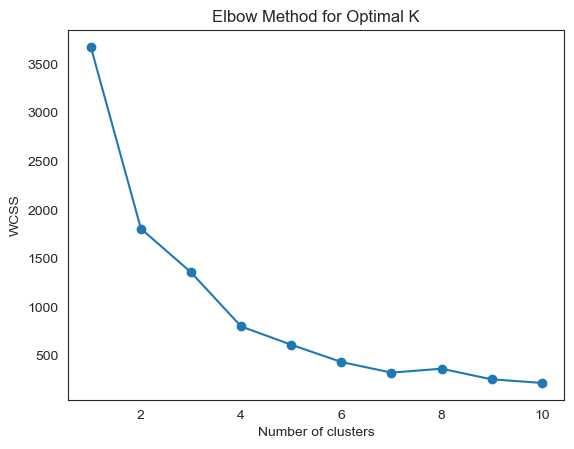

In [45]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define a range of cluster numbers
K_range = range(1, 11)  # e.g., 1 to 10 clusters
wcss = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customers_pca)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(K_range, wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()


There are two criteria for choosing the optimal k value based on the observation of Silhouette diagrams:
1) There should not be clusters that are below the average silhouette score (indicated with the red-dotted line). <br>
2) Wide fluctuations can be noticed in almost all diagrams. However, the least number of fluctuations is in the diagram where the k number is optimal.

By taking these criteria into account, there is no doubt that, in this case, the optimal **k = 7**.

And from elbow method as well we should choose 7 as number of clusters.

##### Applying KNN

In [46]:
km = KMeans(n_clusters = 7)
clusters_km = km.fit_predict(customers_pca).astype(str)
centroids_km = km.cluster_centers_

In [47]:
def visualizing_3d_clusters(data_arr, clusters, centroids, title):
    colors = px.colors.qualitative.Pastel

    # Create hovertext for clusters
    hovertext = ['Cluster: {}'.format(cluster) for cluster in clusters]

    # Create scatter plot for customers PCA
    fig = px.scatter_3d(data_arr, 
                x = customers_pca[:, 0], 
                y = customers_pca[:, 1], 
                z = customers_pca[:, 2],
                color = clusters,
                template = 'plotly_white',
                color_discrete_sequence = colors,
                labels={'x': 'PC0', 'y': 'PC1', 'z': 'PC2'})

    # Update the hovertemplate to include the custom hovertext
    fig.update_traces(
                marker = dict(size = 6,
                line = dict(width=0.1,
                color = 'DarkSlateGrey')),
                hovertemplate = '<b>%{text}</b><br>PC0: %{x}<br>PC1: %{y}<br>PC2: %{z}<extra></extra>',
                text = hovertext,
                selector = dict(type = 'scatter3d'))

    if centroids is not None:
        # Create a separate scatter plot for centroids
        centroids_trace = go.Scatter3d(
                    x = centroids[:, 0], 
                    y = centroids[:, 1], 
                    z = centroids[:, 2],
                    mode = 'markers',
                    marker = dict(size=5, color='red', symbol='x'),
                    name = 'Centroids',
                    hovertemplate = '<b>Centroid</b><br>PC0: %{x}<br>PC1: %{y}<br>PC2: %{z}<extra></extra>')

        # Add centroids trace to the main figure
        fig.add_trace(centroids_trace)

    # Update layout
    fig.update_layout(
                margin = dict(l = 0, r = 0, b = 0, t = 0),
                title = {
                    'text': title,
                    'y': 0.9,
                    'x': 0.5,
                    'xanchor': 'right',
                    'yanchor': 'top'},
                legend_title = "clusters",
                legend = dict(
                    yanchor = "top",
                    y = 0.99,
                    xanchor = "right",
                    x = 0.01),
                showlegend = True)
    
    fig.show()

In [48]:
visualizing_3d_clusters(customers_pca, clusters_km, centroids_km, 'K-Means Clustering')

### DBSCAN

k-NN Distance Plot: For finding value of epsilon.

A k-NN Distance Plot is used to help determine the appropriate value of **eps** in the DBSCAN clustering algorithm. The plot helps identify the distance at which the points start to be considered outliers, which in turn helps in defining the clusters. An optimal **eps** is chosen by detecting the **eps** value for which plot forms elbow shape (marked with red line on provided plot).

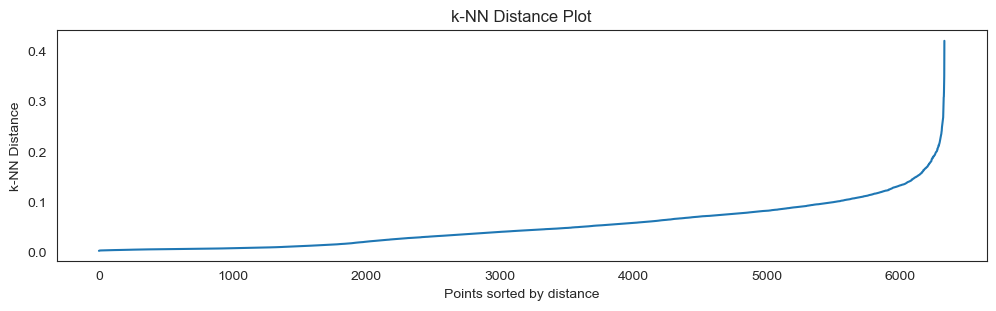

In [49]:
nn = NearestNeighbors(n_neighbors = 20)
neighbors = nn.fit(customers_pca)
distances, indices = neighbors.kneighbors(customers_pca)
distances = np.sort(distances[:, 19])

plt.figure(figsize=(12, 3))
plt.plot(distances)
plt.title('k-NN Distance Plot')
plt.xlabel('Points sorted by distance')
plt.ylabel('k-NN Distance')
plt.show()

The **KneeLocator()** from the **kneed library** is a useful tool to automatically find the **elbow point** in a plot, which is particularly handy for determining the **optimal eps** value for DBSCAN. 

In [50]:
kl = KneeLocator(range(len(distances)), distances, S = 1.0, curve = 'convex', direction = 'increasing')
optimal_eps = distances[kl.elbow]
print(f'Optimal eps: {optimal_eps}')

Optimal eps: 0.16478639457189181


#### Searching optimal min_samples

It is very important to determine the second parameter, **min_samples**, which represents the minimum number of samples required to form a dense region that will be classified as a core point.

In [51]:
optimal_min_samples = None
best_silhouette_score = -1

for min_samples in range(5, 100, 5):
    dbscan = DBSCAN(eps = optimal_eps, min_samples = min_samples)
    clusters = dbscan.fit_predict(customers_pca)
    
    if len(set(clusters)) > 1:
        score = silhouette_score(customers_pca, clusters)
        
        if score > best_silhouette_score:
            best_silhouette_score = score
            optimal_min_samples = min_samples

print(f'Optimal min_samples: {optimal_min_samples} and best Silhouette Score: {best_silhouette_score}')

Optimal min_samples: 40 and best Silhouette Score: 0.6171036686850329


In [52]:
dbscan = DBSCAN(eps = optimal_eps, min_samples = optimal_min_samples)
clusters_dbscan = dbscan.fit_predict(customers_pca).astype(str)

In [53]:
visualizing_3d_clusters(customers_pca, clusters_dbscan, None, 'DBSCAN Clustering')

### Agglomerative Clustering

### Denrogram

The hierarchical nature of the algorithm allows for the creation of a dendrogram, which provides a visual representation of the clustering process and helps in determining the appropriate number of clusters.

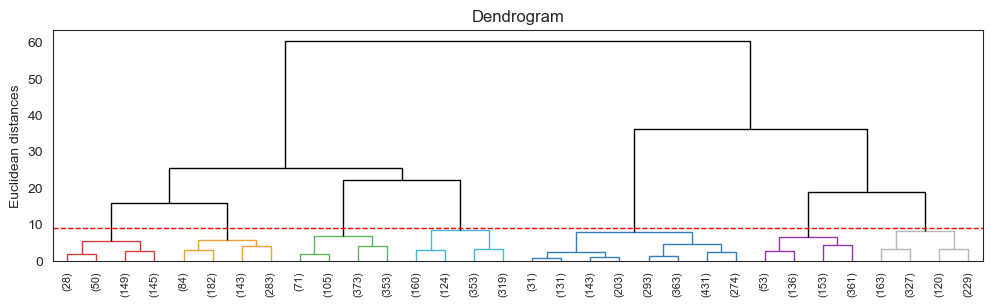

In [54]:
palette = ['#D43F3AFF', '#EEA236FF', '#5CB85CFF', '#46B8DAFF', '#357EBDFF', '#9632B8FF', '#B8B8B8FF']

plt.rcParams['lines.linewidth'] = 1
plt.figure(figsize = (12, 3))

hierarchy.set_link_color_palette(palette)

hierarchy.dendrogram(
    hierarchy.linkage(customers_pca, 'ward'), 
    truncate_mode = 'level', 
    p = 4,
    leaf_rotation = 90,
    leaf_font_size = 8, 
    color_threshold = 9, 
    above_threshold_color = 'black')

plt.axhline(y = 9, color = 'red', linewidth = 1, linestyle = '--')
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.show()

### Algorithm

In [55]:
ac = AgglomerativeClustering(n_clusters = 7, linkage = 'ward')
clusters_ac = ac.fit_predict(customers_pca).astype(str)

In [56]:
visualizing_3d_clusters(customers_pca, clusters_ac, None, 'Agglomerative Clustering')

In [57]:
print('Kmeans', silhouette_score(customers_pca, clusters_km))
print('DBScan', silhouette_score(customers_pca, clusters_dbscan))
print('Agglomerative Clustering', silhouette_score(customers_pca, clusters_ac))

Kmeans 0.6212254605899143
DBScan 0.6171036686850329
Agglomerative Clustering 0.6167592511698096


Agglomerative and DBScan are working similar. In this case I am considering DBScan as it consider do not consider noises. So by seeing that. 

In [58]:
unique_labels = np.unique(clusters_dbscan)
unique_labels = unique_labels[unique_labels != -1]  # Exclude noise

# Step 2: Compute the centroid for each cluster
centroids = []
centroid_dict = {}  # Dictionary to hold cluster labels and centroids

for label in unique_labels:
    cluster_points = customers_pca[clusters_dbscan == label]  # Points in the current cluster
    centroid = cluster_points.mean(axis=0)       # Compute the mean (centroid)
    centroids.append(centroid)
    centroid_dict[label] = centroid  # Add to dictionary with label

# Step 3: Convert centroids list to numpy array for easier handling
centroids = np.array(centroids)

# Output: Centroids of clusters (excluding noise)
print("Centroids of clusters: \n", centroids)
print("Centroid Dictionary: \n", centroid_dict)

Centroids of clusters: 
 [[-0.00523725 -0.09674472  0.11383863]
 [ 0.51395626 -0.46962008 -0.30658518]
 [-0.73491783 -0.16864776  0.00564253]
 [-0.03827551  0.5401187  -0.36341484]
 [ 0.77168281  0.17503857 -0.07722038]
 [-0.32134813  0.43084999  0.24995927]
 [ 0.52981964  0.07698623  0.53993814]
 [ 0.29148027 -0.56694485  0.34944974]]
Centroid Dictionary: 
 {'-1': array([-0.00523725, -0.09674472,  0.11383863]), '0': array([ 0.51395626, -0.46962008, -0.30658518]), '1': array([-0.73491783, -0.16864776,  0.00564253]), '2': array([-0.03827551,  0.5401187 , -0.36341484]), '3': array([ 0.77168281,  0.17503857, -0.07722038]), '4': array([-0.32134813,  0.43084999,  0.24995927]), '5': array([0.52981964, 0.07698623, 0.53993814]), '6': array([ 0.29148027, -0.56694485,  0.34944974])}


In [59]:
pd.DataFrame(centroid_dict, index=customers_pca_df.columns).T

Inst & Freq vs Cash  One-Time vs Inst  Cash-Advance
-1            -0.005237         -0.096745      0.113839
0              0.513956         -0.469620     -0.306585
1             -0.734918         -0.168648      0.005643
2             -0.038276          0.540119     -0.363415
3              0.771683          0.175039     -0.077220
4             -0.321348          0.430850      0.249959
5              0.529820          0.076986      0.539938
6              0.291480         -0.566945      0.349450

## Cluster Summaries and Marketing Strategies

### 1. High Installment & Frequency Users
- **Centroid**: `[0.51395626, -0.46962008, -0.30658518]`
- **Behavior**: These customers prefer to make frequent purchases using installment payments and avoid one-time payments and cash advances.
- **Marketing Strategy**:
  - **Promote Installment Plans**: Focus on highlighting flexible installment offers, such as zero-interest or low-interest installment plans.
  - **Loyalty Rewards**: Offer loyalty points or rewards for each installment paid, motivating repeat purchases and enhancing customer satisfaction.

---

### 2. One-Time Payment Users
- **Centroid**: `[-0.73491783, -0.16864776, 0.00564253]`
- **Behavior**: These customers prefer to make one-time, upfront payments and rarely use installments or cash advances.
- **Marketing Strategy**:
  - **Upfront Payment Discounts**: Offer special discounts for customers who pay the full amount upfront to attract them.
  - **Time-Sensitive Offers**: Use limited-time deals to encourage them to make quick, one-time purchases, boosting immediate sales.

---

### 3. Moderate Installment Users
- **Centroid**: `[-0.03827551, 0.5401187, -0.36341484]`
- **Behavior**: This group balances both installment and one-time payments, with a slight preference for one-time transactions.
- **Marketing Strategy**:
  - **Educate on Installments**: Run campaigns explaining the benefits of installment payments, showing how it helps with budgeting and managing expenses.
  - **Installment Promotions**: Encourage them to use installments for larger purchases with special offers.

---

### 4. Cash-Dependent Users
- **Centroid**: `[0.77168281, 0.17503857, -0.07722038]`
- **Behavior**: These customers frequently use cash withdrawals and installments but avoid one-time payments.
- **Marketing Strategy**:
  - **Cash-Back Offers**: Offer cash-back deals for using installment options, which can reinforce their behavior and boost spending.
  - **Installment-Based Rewards**: Provide loyalty programs that reward customers for regular use of installment payments.

---

### 5. Mixed Payment Users
- **Centroid**: `[-0.32134813, 0.43084999, 0.24995927]`
- **Behavior**: These customers use both installments and one-time payments but also rely on cash advances occasionally.
- **Marketing Strategy**:
  - **Bundle Deals**: Create bundled offers that cater to their mixed preferences, providing options for both one-time payments and installments.
  - **Highlight Flexibility**: Emphasize the flexibility of your payment options to attract them, encouraging larger purchases with installment plans.

---

### 6. High Cash-Advance Users
- **Centroid**: `[0.52981964, 0.07698623, 0.53993814]`
- **Behavior**: These customers rely heavily on cash advances and occasionally use both one-time and installment payments.
- **Marketing Strategy**:
  - **Financial Education**: Launch initiatives focused on helping customers manage their finances better and reduce reliance on cash advances.
  - **Budgeting Tools**: Provide tools or apps that help customers make better financial decisions, showing them the benefits of less reliance on cash advances.

---

### 7. High Frequency Cash-Advance Users
- **Centroid**: `[0.29148027, -0.56694485, 0.34944974]`
- **Behavior**: These customers frequently use cash advances and prefer installment payments.
- **Marketing Strategy**:
  - **Exclusive Membership Programs**: Offer membership programs that give frequent users exclusive benefits, discounts, or special access to promotions.
  - **Targeted Offers**: Use personalized marketing campaigns that promote products matching their frequent installment and cash advance usage, ensuring they see the value in sticking with the company.